## Notebook Import and Packages

In [71]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - A simple cost function

### $$f(x) = x^2 + x + 1$$

In [72]:
def f(x):
    return x**2 + x + 1

In [73]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

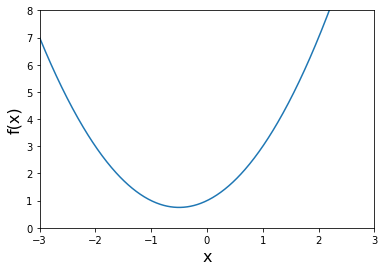

In [74]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Dericatives
Challenge: Create a Python function for the derivatuve of $f(x)$ called $df(x)$

In [75]:
def df(x):
    return 2*x + 1

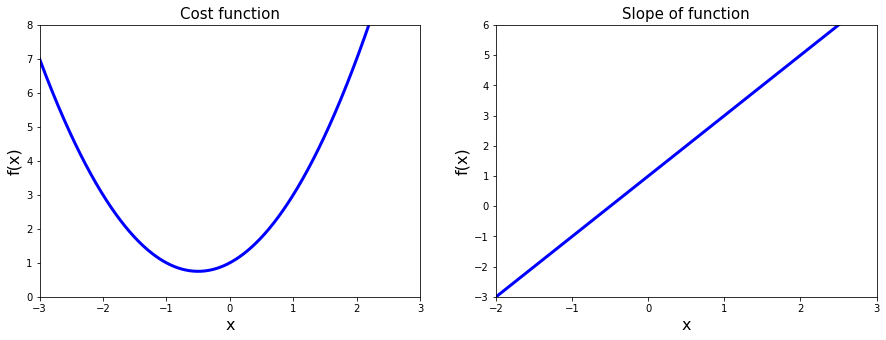

In [76]:
# Plot Function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title("Cost function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color="blue", linewidth=3)
 
# 2 Chart: Dericative 
plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.title("Slope of function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
 
plt.plot(x_1, df(x_1), color="blue", linewidth=3)

plt.show()


## Python Loop and Gradient Descent

In [77]:
# Python For Loop
for n in range(5):
    print("Hello wolrd", n)
print("End of loop")

Hello wolrd 0
Hello wolrd 1
Hello wolrd 2
Hello wolrd 3
Hello wolrd 4
End of loop


In [78]:
# Python while loop
counter = 0
while counter < 7:
    print("Count ...", counter)
    counter += 1
print("Ready or not, here I come!")

Count ... 0
Count ... 1
Count ... 2
Count ... 3
Count ... 4
Count ... 5
Count ... 6
Ready or not, here I come!


In [79]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))

    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print("Loop ran this many times:", n)
        break
    
print("Local minimum occurs at:", new_x)
print("Slope or df(x) value at this point is:", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


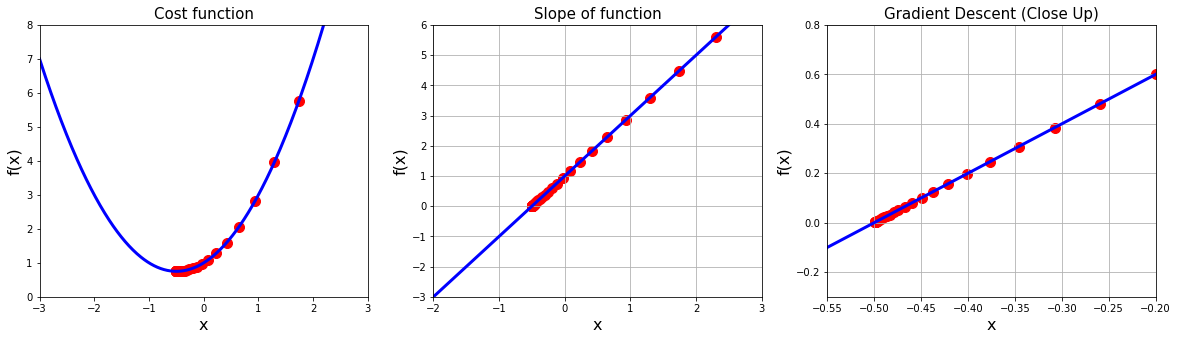

In [80]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)
plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title("Cost function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color="blue", linewidth=3)
values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=1)
 
# 2 Chart: Dericative 
plt.subplot(1, 3, 2)
plt.xlim([-2, 3])
plt.ylim(-3, 6)
plt.grid()

plt.title("Slope of function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.scatter(x_list, slope_list, color="red", s=100, alpha=1)
plt.plot(x_1, df(x_1), color="blue", linewidth=3)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.grid()

plt.title("Gradient Descent (Close Up)", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.scatter(x_list, slope_list, color="red", s=100, alpha=1)
plt.plot(x_1, df(x_1), color="blue", linewidth=3)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [81]:
# Male some data

x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x


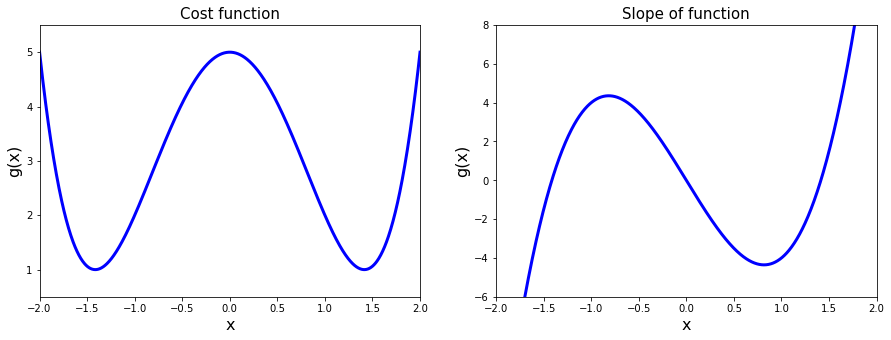

In [82]:
# Plot Function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3)
 
# 2 Chart: Dericative 
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
 
plt.plot(x_2, dg(x_2), color="blue", linewidth=3)

plt.show()


## Gradient Descent as a Python Function

In [83]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    new_x = initial_guess
    
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [84]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Local min ocuurs at:", local_min)
print("Number of steps:", len(list_x))

Local min ocuurs at: 1.4122375085019094
Number of steps: 23


In [90]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print("Local min ocuurs at:", local_min)
print("Number of steps:", len(list_x))

Local min ocuurs at: -1.4120887490901561
Number of steps: 34


Local min ocuurs at: 1.4162520265413683
Number of steps: 12


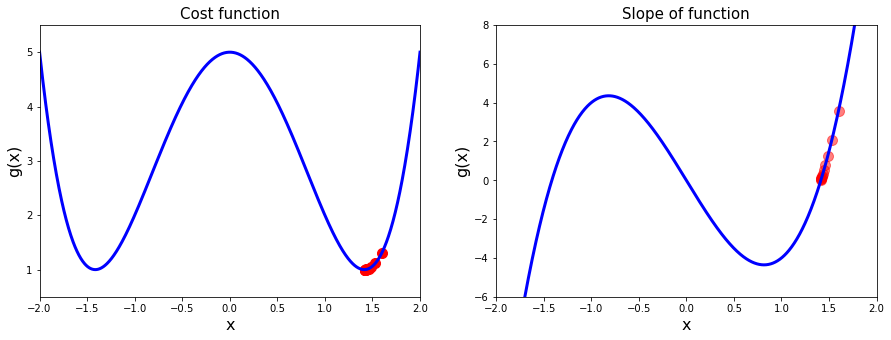

In [101]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.6)
print("Local min ocuurs at:", local_min)
print("Number of steps:", len(list_x))

# Plot Function and derivative and scatter side by side


plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Cost function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=1)

# 2 Chart: Dericative 
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of function", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
 
plt.plot(x_2, dg(x_2), color="blue", linewidth=3)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)

plt.show()
